In [557]:
from datetime import datetime, timedelta
import requests
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [558]:
# Connecting to finviz.com to scrape the data on Stock News
#base URL
finviz_url = 'https://finviz.com/quote.ashx?t='
#List of stocks to be analyzed
tickers = ['AMZN', 'GOOG', 'AAPL', 'JPM', 'JNJ', 'XOM', 'F', 'DIS', 'CVX', 'UL']

In [559]:
#Pulling the data 
news_tables = {}
for ticker in tickers:
    #creating the URL for the request
    url = finviz_url + ticker
    #request
    response = requests.get(url=url, headers={'user-agent': 'my_app'})
    #parsing using BeautifulSoup
    html = BeautifulSoup(response.text, 'html')
    #looking for 'news-table' (the table on the webpage containing the news)
    #store the table with the news in the variable news_table
    news_table = html.find(id='news-table')
    #adds a key(stock ticker) and a value (the news table) to the news_table dictionary
    news_tables[ticker] = news_table
   
#Find the news title in every table row    
parsed_data = []

for ticker, news_table in news_tables.items():
      #find all the <tr> - table row containing the news title
      for row in news_table.findAll('tr'):
                       
             #Find <a> tag (containing title of the article)  and extract the title        
             title = row.find('a')
             if title:
               title = title.text 
             #if there is no title print "No article found"  
             else:
                print("No article link found.")
             #Extract the date and time from the <td> tag
             date_data=[]
             date_data =row.find('td').get_text(strip=True).split(' ')
            
                                    
             if len(date_data) == 1:
                time = date_data[0]
             else:
                if date_data[0] == 'Today': 
                    date = datetime.now().date()
                    time = date_data[1]
                else:
                    date = date_data[0]
                    time = date_data[1]
             #Add the ticker, title, date, and time to the the parsed_data list
             parsed_data.append([ticker, date, time, title])
print (parsed_data)
print(len(parsed_data))
      

No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
[['AMZN', 'Oct-16-24', '07:33PM', 'Amazon doubles down on nuclear energy with deal for small reactors'], ['AMZN', 'Oct-16-24', '07:17PM', 'Amazon takes surprising tactic to solve a growing problem'], ['AMZN', 'Oct-16-24', '06:53PM', 'Election cybersecurity, AI in healthcare: Asking for a Trend'], ['AMZN', 'Oc

In [560]:
#Creating a dataframe from the parsed_data list
df = pd.DataFrame(parsed_data, columns=['Ticker', 'Date', 'Time', 'Title'])
#CLEANING THE DATA *************************************************** 
#1. Deleting the rows that don't contain a title
df = df.dropna(subset=['Title'])
#Normalizing the date format
df['Date'] = pd.to_datetime(df['Date']).dt.date
#create a file with the data to inspect it
df.to_csv('parsed_data.csv')
df.head(10)



/var/folders/30/cz0_gfmd5vb952spxkz78dph0000gn/T/ipykernel_17072/1514948327.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']).dt.date


,Ticker,Date,Time,Title
0,AMZN,2024-10-16,07:33PM,Amazon doubles down on nuclear energy with dea...
1,AMZN,2024-10-16,07:17PM,Amazon takes surprising tactic to solve a grow...
2,AMZN,2024-10-16,06:53PM,"Election cybersecurity, AI in healthcare: Aski..."
3,AMZN,2024-10-16,06:11PM,These Mag 7 giants continue to invest even mor...
4,AMZN,2024-10-16,05:09PM,Amazon invests $500M to go nuclear after Micro...
6,AMZN,2024-10-16,04:13PM,"Amazon Goes Nuclear, Sending IBD's Stock Of Th..."
7,AMZN,2024-10-16,03:50PM,AWS CEO on Amazon's $500 million small modular...
8,AMZN,2024-10-16,03:45PM,Nvidia is set to dominate another Big Tech ear...
9,AMZN,2024-10-16,03:36PM,"Jim Cramer on Amazon, Inc. (AMZN): I Think The..."
10,AMZN,2024-10-16,02:45PM,How to gain 'Magnificent Seven' exposure throu...


In [561]:
#run the sentiment analysis on the titles 
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound'] #if title is not None else None
df['Score'] = df['Title'].apply(f)
df.to_csv('scores.csv')
df.head(10)


,Ticker,Date,Time,Title,Score
0,AMZN,2024-10-16,07:33PM,Amazon doubles down on nuclear energy with dea...,0.4215
1,AMZN,2024-10-16,07:17PM,Amazon takes surprising tactic to solve a grow...,0.3818
2,AMZN,2024-10-16,06:53PM,"Election cybersecurity, AI in healthcare: Aski...",0.0000
3,AMZN,2024-10-16,06:11PM,These Mag 7 giants continue to invest even mor...,0.0000
4,AMZN,2024-10-16,05:09PM,Amazon invests $500M to go nuclear after Micro...,0.1779
6,AMZN,2024-10-16,04:13PM,"Amazon Goes Nuclear, Sending IBD's Stock Of Th...",0.1779
7,AMZN,2024-10-16,03:50PM,AWS CEO on Amazon's $500 million small modular...,0.0000
8,AMZN,2024-10-16,03:45PM,Nvidia is set to dominate another Big Tech ear...,-0.1280
9,AMZN,2024-10-16,03:36PM,"Jim Cramer on Amazon, Inc. (AMZN): I Think The...",0.6124
10,AMZN,2024-10-16,02:45PM,How to gain 'Magnificent Seven' exposure throu...,0.8074


In [562]:
#Filter the news going back maximum 7 days
week_news_df = df[df['Date'] >= (datetime.now().date() - timedelta(days = 7))]

#calculate the average score for each day, and store it in a dataframe
mean_df = week_news_df.groupby(['Ticker', 'Date']).mean('Score')
mean_df = mean_df.unstack()
mean_df = mean_df.xs('Score', axis='columns').transpose()
# Reset the index to make 'Date' a column
mean_df = mean_df.reset_index()
mean_df['Date'] = pd.to_datetime(mean_df['Date'])

# #export to file
mean_df.to_csv('sentiment_scores.csv')
#print the dataframe
mean_df.head(20)



Ticker,Date,AAPL,AMZN,CVX,DIS,F,GOOG,JNJ,JPM,UL,XOM
0,2024-10-10,NaN,NaN,0.000000,0.006450,0.273200,NaN,0.067914,0.333763,-0.07400,0.261717
1,2024-10-11,0.142817,0.339500,-0.013600,NaN,NaN,NaN,0.147020,0.114065,-0.08785,0.103775
2,2024-10-12,0.190333,0.091564,0.000000,0.000000,0.510600,0.072000,0.636900,0.094700,NaN,0.000000
3,2024-10-13,0.190025,0.252220,0.259975,NaN,0.227350,0.367775,0.000000,NaN,NaN,-0.136600
4,2024-10-14,0.203427,0.353969,NaN,0.313133,0.206800,0.158183,0.136000,0.226392,-0.36010,0.101150
5,2024-10-15,0.163126,0.114288,0.474025,-0.285950,0.198137,0.082525,0.076482,0.124570,NaN,0.179700
6,2024-10-16,0.097563,0.211038,0.233225,0.158778,0.000000,0.232267,0.044867,0.044033,NaN,0.218200


In [563]:
for ticker in tickers:
    if ticker in mean_df.columns:
        print(f"Renaming {ticker} to {ticker}_score")
        mean_df.rename(columns={ticker: ticker + '_Score'}, inplace=True)
    else:
        print(f"{ticker} not found in DataFrame columns.")

Renaming AMZN to AMZN_score
Renaming GOOG to GOOG_score
Renaming AAPL to AAPL_score
Renaming JPM to JPM_score
Renaming JNJ to JNJ_score
Renaming XOM to XOM_score
Renaming F to F_score
Renaming DIS to DIS_score
Renaming CVX to CVX_score
Renaming UL to UL_score


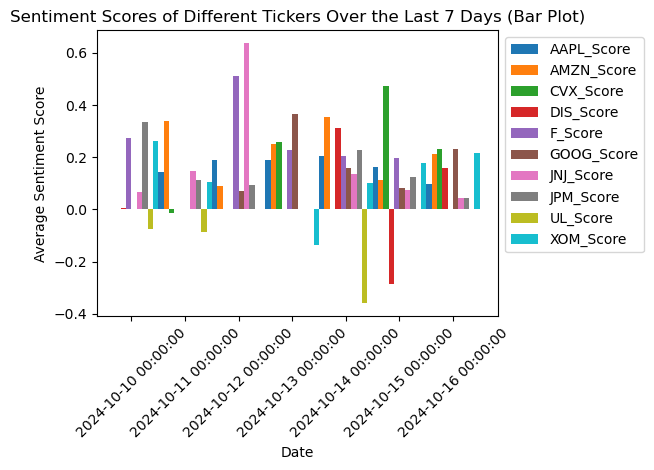

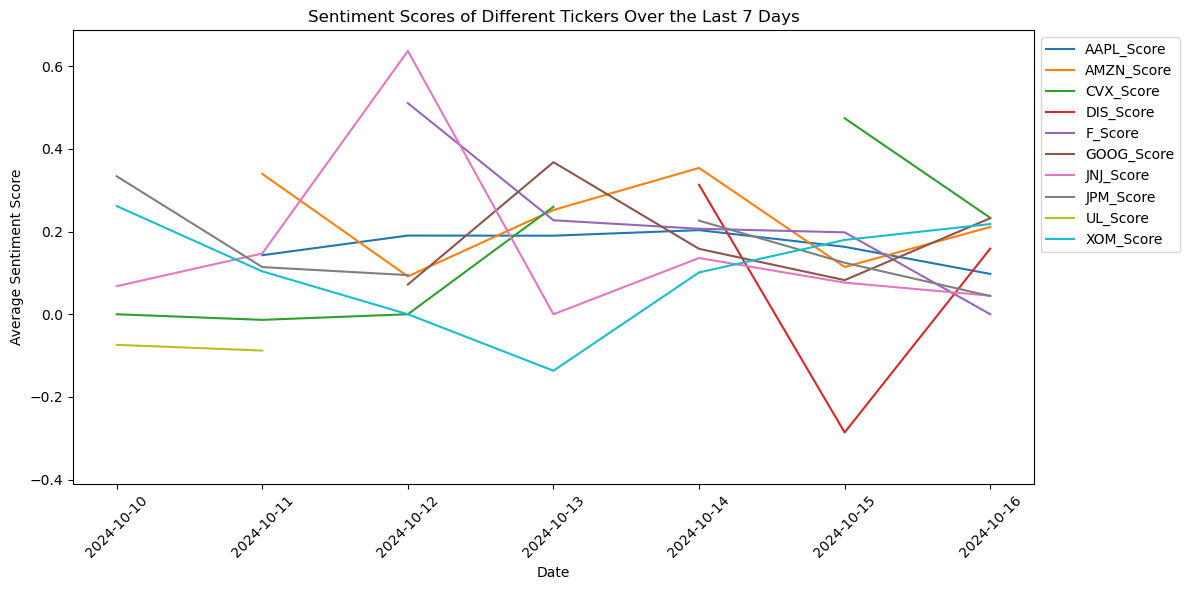

In [564]:
# Plot a grouped bar graph for each 'Date'
tickers = mean_df.columns[1:]  # Exclude 'Date' column
bar_width = 0.1  # Width of the bars
x_positions = range(len(mean_df))  # The x-axis positions for each date

# For each ticker, plot bars at the correct positions
for i, ticker in enumerate(tickers):
    plt.bar(
        [x + i * bar_width for x in x_positions],  # Adjust x position for grouping
        mean_df[ticker],  # Values (sentiment scores)
        width=bar_width,  # Bar width
        label=ticker  # Label for legend
    )

# Add titles and labels
plt.title('Sentiment Scores of Different Tickers Over the Last 7 Days (Bar Plot)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks([x + bar_width * (len(tickers) - 1) / 2 for x in x_positions], mean_df['Date'], rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))  # Set the figure size (optional)

# Plot each ticker's scores over time
for ticker in mean_df.columns[1:]:  # Skip the 'Date' column (first column)
    plt.plot(mean_df['Date'], mean_df[ticker], label=ticker)

# Add titles and labels
plt.title('Sentiment Scores of Different Tickers Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

# plt.figure(figsize=(100, 50))
# mean_df.plot(kind='bar')
# plt.xlabel('Date')
# plt.ylabel('Average Sentiment score')
# plt.xticks(rotation=90)
# plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.tight_layout()
# plt.show()




In [565]:
import yfinance as yf
from datetime import datetime  # Import datetime

# Define the start and end date
start_date = datetime(2024, 10, 8)
end_date = datetime.now().date()  # Use current date as the end date

# Define the list of tickers
tickers = ['AMZN', 'GOOG', 'AAPL', 'JPM', 'JNJ', 'XOM', 'F', 'DIS', 'CVX', 'UL']

# Download historical data for all tickers
yf_data = yf.download(tickers, start=start_date, end=end_date)

# Print the downloaded data
print(yf_data)


[*********************100%***********************]  10 of 10 completed

Price                       Adj Close                                     \
Ticker                           AAPL        AMZN         CVX        DIS   
Date                                                                       
2024-10-08 00:00:00+00:00  225.770004  182.720001  148.750000  92.510002   
2024-10-09 00:00:00+00:00  229.539993  185.169998  149.649994  93.599998   
2024-10-10 00:00:00+00:00  229.039993  186.649994  150.619995  92.989998   
2024-10-11 00:00:00+00:00  227.550003  188.820007  151.419998  94.129997   
2024-10-14 00:00:00+00:00  231.300003  187.539993  151.779999  94.970001   
2024-10-15 00:00:00+00:00  233.850006  187.690002  147.729996  94.220001   
2024-10-16 00:00:00+00:00  231.779999  186.889999  148.729996  96.750000   

Price                                                                 \
Ticker                         F        GOOG         JNJ         JPM   
Date                                                                   
2024-10-08 00:00:00+00:

In [566]:
# Get the Open, High, Low, Close and Volume Columns
stock_data = yf_data[['Open','High','Low', 'Close', 'Volume']]
stock_data.to_csv('stock_data.csv')
print(stock_data)


Price                            Open                                     \
Ticker                           AAPL        AMZN         CVX        DIS   
Date                                                                       
2024-10-08 00:00:00+00:00  224.300003  181.919998  149.199997  92.519997   
2024-10-09 00:00:00+00:00  225.229996  182.820007  147.509995  91.860001   
2024-10-10 00:00:00+00:00  227.779999  187.130005  150.679993  93.720001   
2024-10-11 00:00:00+00:00  229.300003  186.630005  150.380005  92.849998   
2024-10-14 00:00:00+00:00  228.699997  189.779999  150.520004  94.180000   
2024-10-15 00:00:00+00:00  233.610001  187.630005  148.800003  95.250000   
2024-10-16 00:00:00+00:00  231.619995  187.050003  148.350006  93.730003   

Price                                                                 \
Ticker                         F        GOOG         JNJ         JPM   
Date                                                                   
2024-10-08 00:00:00+00:

In [567]:
# Flatten the MultiIndex columns into simple column names
stock_data_reset.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data_reset.columns.values]

# Clean up the column names
stock_data_reset.columns = [col.replace('_', '').replace(' ', '').replace('__', '_') for col in stock_data_reset.columns]

# Check the updated column names
print(stock_data_reset.columns)




stock_data_reset.to_csv('stocks.csv')



Index(['Date', 'OpenAAPL', 'OpenAMZN', 'OpenCVX', 'OpenDIS', 'OpenF',
       'OpenGOOG', 'OpenJNJ', 'OpenJPM', 'OpenUL', 'OpenXOM', 'HighAAPL',
       'HighAMZN', 'HighCVX', 'HighDIS', 'HighF', 'HighGOOG', 'HighJNJ',
       'HighJPM', 'HighUL', 'HighXOM', 'LowAAPL', 'LowAMZN', 'LowCVX',
       'LowDIS', 'LowF', 'LowGOOG', 'LowJNJ', 'LowJPM', 'LowUL', 'LowXOM',
       'CloseAAPL', 'CloseAMZN', 'CloseCVX', 'CloseDIS', 'CloseF', 'CloseGOOG',
       'CloseJNJ', 'CloseJPM', 'CloseUL', 'CloseXOM', 'VolumeAAPL',
       'VolumeAMZN', 'VolumeCVX', 'VolumeDIS', 'VolumeF', 'VolumeGOOG',
       'VolumeJNJ', 'VolumeJPM', 'VolumeUL', 'VolumeXOM'],
      dtype='object')


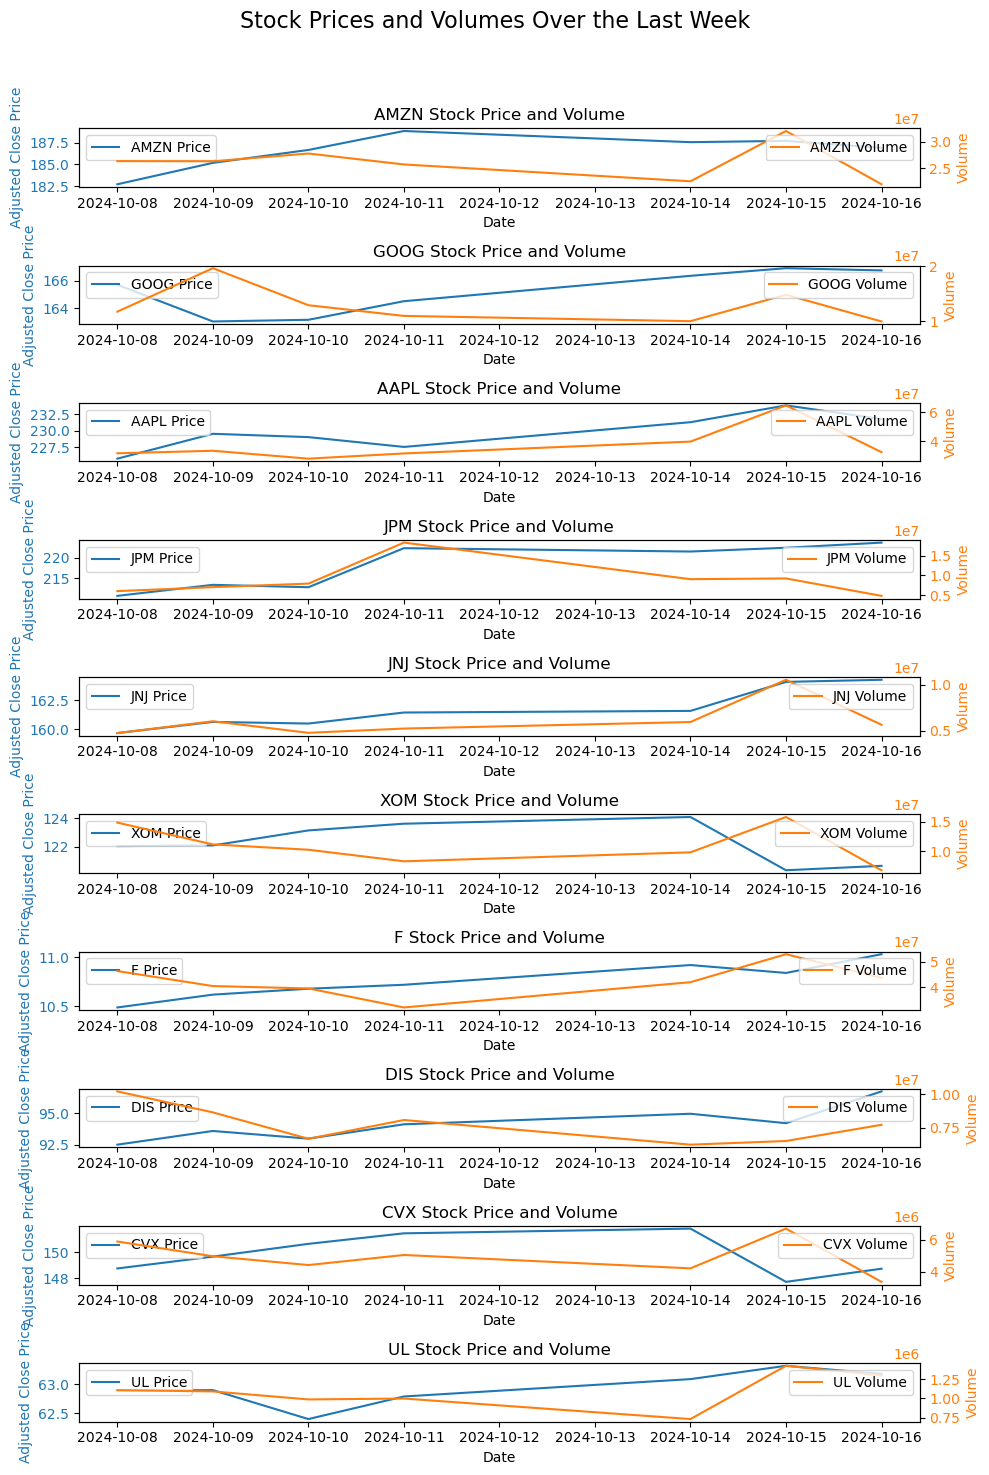

In [568]:

fig, axes = plt.subplots(nrows=len(tickers), figsize=(10, 15))
fig.suptitle('Stock Prices and Volumes Over the Last Week', fontsize=16)
    
for i, ticker in enumerate(tickers):
    ax1 = axes[i]
    color1 = 'tab:blue'
    ax1.plot(stock_data['Close'][ticker], label=f'{ticker} Price', color=color1)
    ax1.set_title(f'{ticker} Stock Price and Volume')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.legend(loc='upper left')
        
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color2 = 'tab:orange'
    ax2.plot(stock_data['Volume'][ticker], label=f'{ticker} Volume', color=color2)
    ax2.set_ylabel('Volume', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [569]:
# Concatenate DataFrames based on index
merged_df = pd.concat([stock_data_reset, mean_df], axis=1, join='outer')

# Check for duplicate columns and remove duplicates (if any)
if 'Date' in merged_df.columns:
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Ensure the 'Date' column is in datetime format (if necessary)
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')


# tickers = ['AMZN', 'GOOG', 'AAPL', 'JPM', 'JNJ', 'XOM', 'F', 'DIS', 'CVX', 'UL']

# # Create an empty list to hold the final column order
# final_order = ['Date']  # First column is always 'Date'

# # Loop through each ticker and group its columns together in the desired order
# for ticker in tickers:
#     # For each ticker, we need to group all of its columns together
#     ticker_columns = [
#         ticker,  # Add the ticker column itself (like 'AMZN', 'GOOG', etc.)
#         'Open' + ticker, 
#         'High' + ticker, 
#         'Low' + ticker, 
#         'Close' + ticker, 
#         'Volume' + ticker
#     ]
    
#     # Check if all the columns in the group exist in the DataFrame
#     existing_columns = [col for col in ticker_columns if col in merged_df_cleaned.columns]
    
#     # Debug print to check which columns are found
#     print(f"Ticker: {ticker}, Found columns: {existing_columns}")
    
#     # If at least the 'Date' column and ticker-related columns exist, add them to the final order
#     if len(existing_columns) > 1:  # Ensure there's more than just the 'Date' column
#         # Add the ticker's columns to the final column order
#         final_order.extend(existing_columns[1:])  # Add everything except the 'Date' column
#     else:
#         print(f"Columns for {ticker} not fully found. Missing: {set(ticker_columns) - set(existing_columns)}. Skipping...")

# # Reorder the DataFrame columns based on the final order list
# merged_df_cleaned = merged_df_cleaned[final_order]

# Debug print to check the new column order
print("Columns after reordering:", merged_df_cleaned.columns.tolist())



# Forward fill the NaT values in 'Date' column
merged_df_cleaned = merged_df.ffill()

# # Check the result
# print(merged_df_cleaned.head())

merged_df_cleaned.to_csv('Merged.csv')


Columns after reordering: ['Date', 'OpenAAPL', 'OpenAMZN', 'OpenCVX', 'OpenDIS', 'OpenF', 'OpenGOOG', 'OpenJNJ', 'OpenJPM', 'OpenUL', 'OpenXOM', 'HighAAPL', 'HighAMZN', 'HighCVX', 'HighDIS', 'HighF', 'HighGOOG', 'HighJNJ', 'HighJPM', 'HighUL', 'HighXOM', 'LowAAPL', 'LowAMZN', 'LowCVX', 'LowDIS', 'LowF', 'LowGOOG', 'LowJNJ', 'LowJPM', 'LowUL', 'LowXOM', 'CloseAAPL', 'CloseAMZN', 'CloseCVX', 'CloseDIS', 'CloseF', 'CloseGOOG', 'CloseJNJ', 'CloseJPM', 'CloseUL', 'CloseXOM', 'VolumeAAPL', 'VolumeAMZN', 'VolumeCVX', 'VolumeDIS', 'VolumeF', 'VolumeGOOG', 'VolumeJNJ', 'VolumeJPM', 'VolumeUL', 'VolumeXOM', 'index', 'AAPL_Score', 'AMZN_Score', 'CVX_Score', 'DIS_Score', 'F_Score', 'GOOG_Score', 'JNJ_Score', 'JPM_Score', 'UL_Score', 'XOM_Score']


                       Date    OpenAAPL    OpenAMZN     OpenCVX    OpenDIS  \
0 2024-10-08 00:00:00+00:00  224.300003  181.919998  149.199997  92.519997   
1 2024-10-09 00:00:00+00:00  225.229996  182.820007  147.509995  91.860001   
2 2024-10-10 00:00:00+00:00  227.779999  187.130005  150.679993  93.720001   
3 2024-10-11 00:00:00+00:00  229.300003  186.630005  150.380005  92.849998   
4 2024-10-14 00:00:00+00:00  228.699997  189.779999  150.520004  94.180000   

   OpenF    OpenGOOG     OpenJNJ     OpenJPM     OpenUL  ...  AAPL_Score  \
0  10.50  165.429993  159.490005  210.580002  62.680000  ...         NaN   
1  10.49  164.854996  159.919998  209.699997  62.639999  ...    0.142817   
2  10.58  162.110001  161.360001  214.809998  62.660000  ...    0.190333   
3  10.64  163.330002  162.179993  215.669998  62.810001  ...    0.190025   
4  10.71  164.910004  161.399994  223.199997  62.730000  ...    0.203427   

   AMZN_Score  CVX_Score  DIS_Score  F_Score  GOOG_Score  JNJ_Score  \
0  

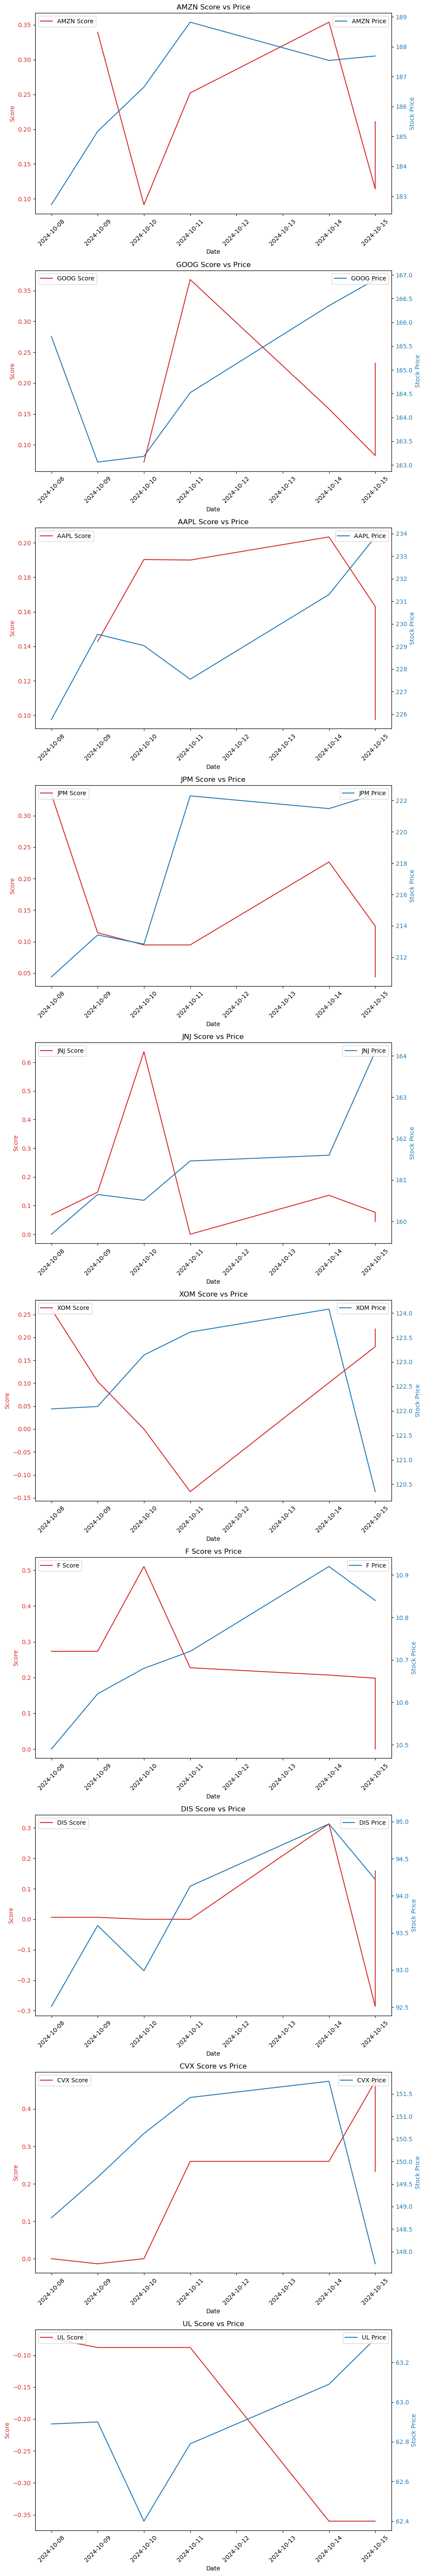

In [588]:
print(merged_df_cleaned.head())

# Set 'Date' column as index (if not already set)
if 'Date' in merged_df_cleaned.columns:
    merged_df_cleaned.set_index('Date', inplace=True)

# Verify the index is now datetime
print(merged_df_cleaned.index)  # Should show DatetimeIndex
print(merged_df_cleaned.head())  # Check the first few rows to ensure dates are correct

# Creating subplots
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(10, 6 * len(tickers)))

# Ensure 'axes' is always an array, even if there's only one subplot
if len(tickers) == 1:
    axes = [axes]

# Loop through each ticker and plot
for i, ticker in enumerate(tickers):
    ax1 = axes[i]

    # Plotting Scores (left y-axis)
    score_col = ticker + '_Score'
    if score_col in merged_df_cleaned.columns and not merged_df_cleaned[score_col].isna().all():
        ax1.plot(merged_df_cleaned.index, merged_df_cleaned[score_col], label=f'{ticker} Score', color='tab:red')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Score', color='tab:red')
        ax1.tick_params(axis='y', labelcolor='tab:red')
        ax1.legend(loc='upper left')  # Place legend for score

    # Create a second y-axis for stock prices (right y-axis)
    ax2 = ax1.twinx()

    # Plotting Stock Prices (right y-axis)
    price_col = 'Close' + ticker
    if price_col in merged_df_cleaned.columns and not merged_df_cleaned[price_col].isna().all():
        ax2.plot(merged_df_cleaned.index, merged_df_cleaned[price_col], label=f'{ticker} Price', color='tab:blue')
        ax2.set_ylabel('Stock Price', color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.legend(loc='upper right')  # Place legend for stock price

    # Setting title for each subplot
    ax1.set_title(f'{ticker} Score vs Price')

    # ** Format the x-axis to show actual dates **
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically space out date ticks
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date labels as Year-Month-Day

    # Optional: Rotate x-axis labels for better readability (if needed)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    ax1.tick_params(axis='x', labelrotation=45)

# Automatically adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()
